In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

np.random.seed(0)

import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical

from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
config.log_device_placement = True
sess = tf.compat.v1.Session(config=config)
set_session(sess)

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device



# Simple CNN for Edgelovers

## a) Generation of data

In [74]:
def generate_data(xlen, ylen, n):
    data = np.zeros(shape=(n, xlen, ylen, 1), dtype=np.uint8)
    labels = np.zeros(shape=(n), dtype=np.int).squeeze()
    
    for i in range(n):
        img = np.random.random((xlen, ylen, 1)) * 128
        
        v_or_h = np.random.randint(0, 2)
        lines = 10
        
        if v_or_h: # horizontal
            label = 0.0
            for _ in range(lines):
                y = np.random.randint(2, ylen - 2)
                x1 = np.random.randint(2, xlen - 10)
                x2 = x1 + 10
                img[y, x1:x2] = 255.0
        else:  # vertical
            label = 1.0
            for _ in range(lines):
                x = np.random.randint(2, xlen - 2)
                y1 = np.random.randint(2, ylen - 10)
                y2 = y1 + 10
                img[y1:y2, x] = 255.0
        
        data[i] = img.copy()
        labels[i] = label
    return data, labels.squeeze()

In [75]:
x0, y0 = generate_data(50, 50, 1000)
x2, y2 = generate_data(50, 50, 1000);

Label: 0


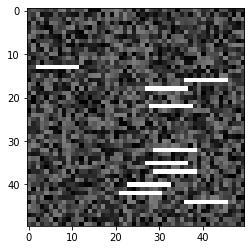

In [76]:
img = x0[0, :, :, 0]
plt.imshow(img, cmap='gray')
print("Label: {}".format(y0[0]))

## b) Build the simplest possible CNN

In [77]:
n_kernel = 2
n_epochs = 1000
batch_size = 4
lr = 0.1

model = Sequential()
model.add(Conv2D(n_kernel, kernel_size=5, strides=2, activation='relu', input_shape=(50, 50, 1), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=8, strides=8))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer="adam", loss='binary_crossentropy', lr=lr, metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 23, 23, 2)         52        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 2)           0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 8)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [78]:
history = model.fit(x0, y0, batch_size=batch_size, epochs=n_epochs, validation_data=(x2, y2));

Train on 1000 samples, validate on 1000 samples
Epoch 1/1000
1000/1000 [==============================] - 1s 1ms/sample - loss: 38.6749 - accuracy: 0.5720 - val_loss: 6.4009 - val_accuracy: 0.6590
Epoch 2/1000
1000/1000 [==============================] - 1s 959us/sample - loss: 3.2927 - accuracy: 0.7620 - val_loss: 2.7189 - val_accuracy: 0.7580
Epoch 3/1000
1000/1000 [==============================] - 1s 954us/sample - loss: 1.6257 - accuracy: 0.8410 - val_loss: 1.5819 - val_accuracy: 0.8280
Epoch 4/1000
1000/1000 [==============================] - 1s 1ms/sample - loss: 1.1202 - accuracy: 0.8700 - val_loss: 1.0998 - val_accuracy: 0.8710
Epoch 5/1000
1000/1000 [==============================] - 1s 931us/sample - loss: 0.8308 - accuracy: 0.8920 - val_loss: 0.8196 - val_accuracy: 0.8950
Epoch 6/1000
1000/1000 [==============================] - 1s 955us/sample - loss: 0.6369 - accuracy: 0.9230 - val_loss: 0.6280 - val_accuracy: 0.9140
Epoch 7/1000
1000/1000 [==============================]

1000/1000 [==============================] - 1s 962us/sample - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0343 - val_accuracy: 0.9910
Epoch 56/1000
1000/1000 [==============================] - 1s 939us/sample - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0349 - val_accuracy: 0.9920
Epoch 57/1000
1000/1000 [==============================] - 1s 943us/sample - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0320 - val_accuracy: 0.9900
Epoch 58/1000
1000/1000 [==============================] - 1s 936us/sample - loss: 0.0460 - accuracy: 0.9930 - val_loss: 0.0251 - val_accuracy: 0.9930
Epoch 59/1000
1000/1000 [==============================] - 1s 932us/sample - loss: 0.0099 - accuracy: 0.9990 - val_loss: 0.0290 - val_accuracy: 0.9930
Epoch 60/1000
1000/1000 [==============================] - 1s 938us/sample - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0307 - val_accuracy: 0.9930
Epoch 61/1000
1000/1000 [==============================] - 1s 933us/sample - loss: 0.0066 - accuracy: 1.0000

1000/1000 [==============================] - 1s 935us/sample - loss: 0.0062 - accuracy: 0.9990 - val_loss: 0.0205 - val_accuracy: 0.9960
Epoch 110/1000
1000/1000 [==============================] - 1s 916us/sample - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0213 - val_accuracy: 0.9960
Epoch 111/1000
1000/1000 [==============================] - 1s 936us/sample - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0231 - val_accuracy: 0.9960
Epoch 112/1000
1000/1000 [==============================] - 1s 929us/sample - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0237 - val_accuracy: 0.9960
Epoch 113/1000
1000/1000 [==============================] - 1s 934us/sample - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0226 - val_accuracy: 0.9950
Epoch 114/1000
1000/1000 [==============================] - 1s 937us/sample - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0241 - val_accuracy: 0.9960
Epoch 115/1000
1000/1000 [==============================] - 1s 925us/sample - loss: 0.0039 - accuracy: 

1000/1000 [==============================] - 1s 932us/sample - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0268 - val_accuracy: 0.9940
Epoch 164/1000
1000/1000 [==============================] - 1s 928us/sample - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0290 - val_accuracy: 0.9940
Epoch 165/1000
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0280 - val_accuracy: 0.9930
Epoch 166/1000
1000/1000 [==============================] - 1s 959us/sample - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0316 - val_accuracy: 0.9940
Epoch 167/1000
1000/1000 [==============================] - 1s 924us/sample - loss: 0.0599 - accuracy: 0.9940 - val_loss: 1.0006 - val_accuracy: 0.8770
Epoch 168/1000
1000/1000 [==============================] - 1s 970us/sample - loss: 0.0136 - accuracy: 0.9940 - val_loss: 0.0138 - val_accuracy: 0.9960
Epoch 169/1000
1000/1000 [==============================] - 1s 938us/sample - loss: 0.0034 - accuracy: 1.

1000/1000 [==============================] - 1s 940us/sample - loss: 0.0065 - accuracy: 0.9980 - val_loss: 0.0108 - val_accuracy: 0.9980
Epoch 218/1000
1000/1000 [==============================] - 1s 937us/sample - loss: 0.0049 - accuracy: 0.9990 - val_loss: 0.0104 - val_accuracy: 0.9970
Epoch 219/1000
1000/1000 [==============================] - 1s 914us/sample - loss: 0.0065 - accuracy: 0.9980 - val_loss: 0.0104 - val_accuracy: 0.9970
Epoch 220/1000
1000/1000 [==============================] - 1s 970us/sample - loss: 0.0155 - accuracy: 0.9950 - val_loss: 0.0130 - val_accuracy: 0.9950
Epoch 221/1000
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0164 - val_accuracy: 0.9950
Epoch 222/1000
1000/1000 [==============================] - 1s 935us/sample - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy: 0.9970
Epoch 223/1000
1000/1000 [==============================] - 1s 985us/sample - loss: 0.0030 - accuracy: 1.

1000/1000 [==============================] - 1s 943us/sample - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0275 - val_accuracy: 0.9930
Epoch 272/1000
1000/1000 [==============================] - 1s 932us/sample - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0271 - val_accuracy: 0.9940
Epoch 273/1000
1000/1000 [==============================] - 1s 939us/sample - loss: 0.0086 - accuracy: 0.9990 - val_loss: 3.3138 - val_accuracy: 0.6810
Epoch 274/1000
1000/1000 [==============================] - 1s 924us/sample - loss: 0.0656 - accuracy: 0.9850 - val_loss: 0.0214 - val_accuracy: 0.9930
Epoch 275/1000
1000/1000 [==============================] - 1s 944us/sample - loss: 0.0071 - accuracy: 0.9980 - val_loss: 0.0181 - val_accuracy: 0.9960
Epoch 276/1000
1000/1000 [==============================] - 1s 933us/sample - loss: 0.0065 - accuracy: 0.9990 - val_loss: 0.0156 - val_accuracy: 0.9960
Epoch 277/1000
1000/1000 [==============================] - 1s 938us/sample - loss: 0.0052 - accuracy: 

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0125 - val_accuracy: 0.9970
Epoch 326/1000
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0150 - val_accuracy: 0.9950
Epoch 327/1000
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0180 - val_accuracy: 0.9930
Epoch 328/1000
1000/1000 [==============================] - 1s 946us/sample - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0135 - val_accuracy: 0.9970
Epoch 329/1000
1000/1000 [==============================] - 1s 942us/sample - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 0.9970
Epoch 330/1000
1000/1000 [==============================] - 1s 933us/sample - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0150 - val_accuracy: 0.9960
Epoch 331/1000
1000/1000 [==============================] - 1s 933us/sample - loss: 0.0024 - accuracy: 1.0000

1000/1000 [==============================] - 1s 982us/sample - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0299 - val_accuracy: 0.9940
Epoch 380/1000
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0067 - accuracy: 0.9970 - val_loss: 0.2232 - val_accuracy: 0.9520
Epoch 381/1000
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0186 - accuracy: 0.9930 - val_loss: 0.0237 - val_accuracy: 0.9960
Epoch 382/1000
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0235 - val_accuracy: 0.9960
Epoch 383/1000
1000/1000 [==============================] - 1s 964us/sample - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0279 - val_accuracy: 0.9940
Epoch 384/1000
1000/1000 [==============================] - 1s 986us/sample - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0290 - val_accuracy: 0.9940
Epoch 385/1000
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0026 - accuracy: 1.0000 -

1000/1000 [==============================] - 1s 918us/sample - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0177 - val_accuracy: 0.9940
Epoch 434/1000
1000/1000 [==============================] - 1s 919us/sample - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0178 - val_accuracy: 0.9940
Epoch 435/1000
1000/1000 [==============================] - 1s 920us/sample - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0187 - val_accuracy: 0.9940
Epoch 436/1000
1000/1000 [==============================] - 1s 916us/sample - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0194 - val_accuracy: 0.9940
Epoch 437/1000
1000/1000 [==============================] - 1s 920us/sample - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0217 - val_accuracy: 0.9930
Epoch 438/1000
1000/1000 [==============================] - 1s 977us/sample - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0205 - val_accuracy: 0.9950
Epoch 439/1000
1000/1000 [==============================] - 1s 986us/sample - loss: 0.0018 - accuracy: 

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0131 - val_accuracy: 0.9970
Epoch 488/1000
1000/1000 [==============================] - 1s 993us/sample - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0137 - val_accuracy: 0.9960
Epoch 489/1000
1000/1000 [==============================] - 1s 954us/sample - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0157 - val_accuracy: 0.9950
Epoch 490/1000
1000/1000 [==============================] - 1s 970us/sample - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0181 - val_accuracy: 0.9930
Epoch 491/1000
1000/1000 [==============================] - 1s 957us/sample - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0144 - val_accuracy: 0.9960
Epoch 492/1000
1000/1000 [==============================] - 1s 936us/sample - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0173 - val_accuracy: 0.9950
Epoch 493/1000
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0018 - accuracy: 1.00

1000/1000 [==============================] - 1s 957us/sample - loss: 0.0055 - accuracy: 0.9990 - val_loss: 0.0159 - val_accuracy: 0.9950
Epoch 542/1000
1000/1000 [==============================] - 1s 947us/sample - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0189 - val_accuracy: 0.9940
Epoch 543/1000
1000/1000 [==============================] - 1s 953us/sample - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0228 - val_accuracy: 0.9940
Epoch 544/1000
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0201 - val_accuracy: 0.9940
Epoch 545/1000
1000/1000 [==============================] - 1s 964us/sample - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0198 - val_accuracy: 0.9950
Epoch 546/1000
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0213 - val_accuracy: 0.9930
Epoch 547/1000
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0022 - accuracy: 1.0000

1000/1000 [==============================] - 1s 955us/sample - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 0.9970
Epoch 596/1000
1000/1000 [==============================] - 1s 928us/sample - loss: 0.0150 - accuracy: 0.9970 - val_loss: 0.0174 - val_accuracy: 0.9910
Epoch 597/1000
1000/1000 [==============================] - 1s 938us/sample - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0137 - val_accuracy: 0.9950
Epoch 598/1000
1000/1000 [==============================] - 1s 927us/sample - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0118 - val_accuracy: 0.9970
Epoch 599/1000
1000/1000 [==============================] - 1s 930us/sample - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0114 - val_accuracy: 0.9980
Epoch 600/1000
1000/1000 [==============================] - 1s 921us/sample - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0136 - val_accuracy: 0.9960
Epoch 601/1000
1000/1000 [==============================] - 1s 923us/sample - loss: 0.0022 - accuracy: 

1000/1000 [==============================] - 1s 999us/sample - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0185 - val_accuracy: 0.9950
Epoch 650/1000
1000/1000 [==============================] - 1s 923us/sample - loss: 0.0510 - accuracy: 0.9880 - val_loss: 0.0141 - val_accuracy: 0.9940
Epoch 651/1000
1000/1000 [==============================] - 1s 940us/sample - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0135 - val_accuracy: 0.9950
Epoch 652/1000
1000/1000 [==============================] - 1s 931us/sample - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0120 - val_accuracy: 0.9960
Epoch 653/1000
1000/1000 [==============================] - 1s 928us/sample - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 0.9970
Epoch 654/1000
1000/1000 [==============================] - 1s 925us/sample - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 0.9970
Epoch 655/1000
1000/1000 [==============================] - 1s 921us/sample - loss: 0.0026 - accuracy: 

1000/1000 [==============================] - 1s 941us/sample - loss: 0.0299 - accuracy: 0.9960 - val_loss: 0.7010 - val_accuracy: 0.8720
Epoch 704/1000
1000/1000 [==============================] - 1s 928us/sample - loss: 0.0404 - accuracy: 0.9910 - val_loss: 0.0113 - val_accuracy: 0.9970
Epoch 705/1000
1000/1000 [==============================] - 1s 930us/sample - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.0129 - val_accuracy: 0.9950
Epoch 706/1000
1000/1000 [==============================] - 1s 922us/sample - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0134 - val_accuracy: 0.9960
Epoch 707/1000
1000/1000 [==============================] - 1s 969us/sample - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 0.9950
Epoch 708/1000
1000/1000 [==============================] - 1s 931us/sample - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0170 - val_accuracy: 0.9950
Epoch 709/1000
1000/1000 [==============================] - 1s 936us/sample - loss: 0.0022 - accuracy: 

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0100 - val_accuracy: 0.9970
Epoch 758/1000
1000/1000 [==============================] - 1s 915us/sample - loss: 0.0046 - accuracy: 0.9990 - val_loss: 0.0305 - val_accuracy: 0.9900
Epoch 759/1000
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0164 - accuracy: 0.9970 - val_loss: 0.0100 - val_accuracy: 0.9970
Epoch 760/1000
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 0.9970
Epoch 761/1000
1000/1000 [==============================] - 1s 926us/sample - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 0.9960
Epoch 762/1000
1000/1000 [==============================] - 1s 923us/sample - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0127 - val_accuracy: 0.9960
Epoch 763/1000
1000/1000 [==============================] - 1s 925us/sample - loss: 0.0023 - accuracy: 1.0000

1000/1000 [==============================] - 1s 920us/sample - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0175 - val_accuracy: 0.9960
Epoch 812/1000
1000/1000 [==============================] - 1s 944us/sample - loss: 0.0195 - accuracy: 0.9940 - val_loss: 0.0115 - val_accuracy: 0.9980
Epoch 813/1000
1000/1000 [==============================] - 1s 976us/sample - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 0.9980
Epoch 814/1000
1000/1000 [==============================] - 1s 927us/sample - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0100 - val_accuracy: 0.9970
Epoch 815/1000
1000/1000 [==============================] - 1s 951us/sample - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 0.9970
Epoch 816/1000
1000/1000 [==============================] - 1s 969us/sample - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 0.9970
Epoch 817/1000
1000/1000 [==============================] - 1s 929us/sample - loss: 0.0025 - accuracy: 

1000/1000 [==============================] - 1s 935us/sample - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0198 - val_accuracy: 0.9940
Epoch 866/1000
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0206 - val_accuracy: 0.9940
Epoch 867/1000
1000/1000 [==============================] - 1s 939us/sample - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0208 - val_accuracy: 0.9940
Epoch 868/1000
1000/1000 [==============================] - 1s 926us/sample - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0199 - val_accuracy: 0.9940
Epoch 869/1000
1000/1000 [==============================] - 1s 972us/sample - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0197 - val_accuracy: 0.9940
Epoch 870/1000
1000/1000 [==============================] - 1s 935us/sample - loss: 0.0613 - accuracy: 0.9840 - val_loss: 0.0314 - val_accuracy: 0.9870
Epoch 871/1000
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0052 - accuracy: 0.99

1000/1000 [==============================] - 1s 985us/sample - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy: 0.9960
Epoch 920/1000
1000/1000 [==============================] - 1s 963us/sample - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0220 - val_accuracy: 0.9930
Epoch 921/1000
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0183 - accuracy: 0.9950 - val_loss: 0.0229 - val_accuracy: 0.9910
Epoch 922/1000
1000/1000 [==============================] - 1s 934us/sample - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 0.9970
Epoch 923/1000
1000/1000 [==============================] - 1s 971us/sample - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0129 - val_accuracy: 0.9930
Epoch 924/1000
1000/1000 [==============================] - 1s 931us/sample - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 0.9970
Epoch 925/1000
1000/1000 [==============================] - 1s 917us/sample - loss: 0.0022 - accuracy: 1.

1000/1000 [==============================] - 1s 914us/sample - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0123 - val_accuracy: 0.9940
Epoch 974/1000
1000/1000 [==============================] - 1s 924us/sample - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 0.9970
Epoch 975/1000
1000/1000 [==============================] - 1s 928us/sample - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0266 - val_accuracy: 0.9890
Epoch 976/1000
1000/1000 [==============================] - 1s 928us/sample - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0241 - val_accuracy: 0.9920
Epoch 977/1000
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 0.9970
Epoch 978/1000
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 0.9960
Epoch 979/1000
1000/1000 [==============================] - 1s 921us/sample - loss: 0.0020 - accuracy: 1.00

In [79]:
score_train = model.evaluate(x0, y0, verbose=0)
print("Loss train set: {}".format(score_train[0]))
print("Accuracy train set: {}".format(score_train[1]))
print()
score_val = model.evaluate(x2, y2, verbose=0)
print("Loss validation set: {}".format(score_val[0]))
print("Accuracy validation set: {}".format(score_val[1]))
print()

Loss train set: 0.0022544173523783686
Accuracy train set: 1.0

Loss validation set: 0.012790242331102491
Accuracy validation set: 0.996999979019165



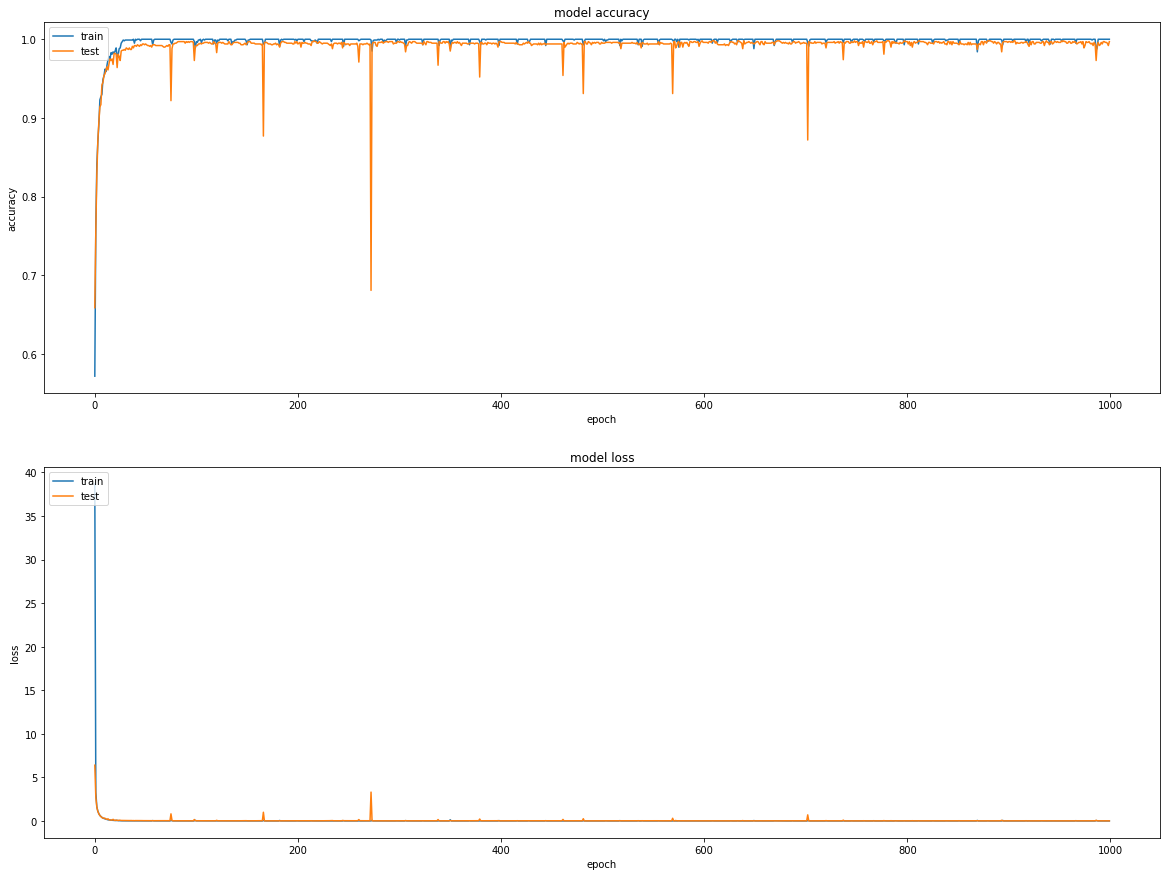

In [80]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))

axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('model accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['train', 'test'], loc='upper left')

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('model loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].legend(['train', 'test'], loc='upper left')

## c) Visualize the learned kernel

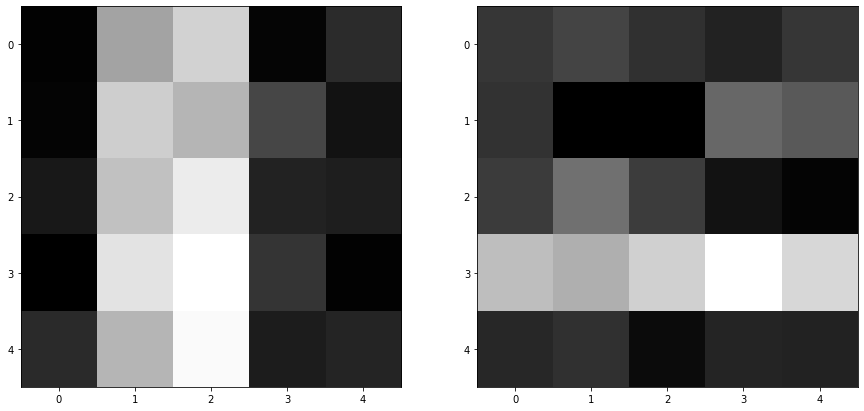

In [81]:
conv_layer = model.layers[0]
filters, biases = conv_layer.get_weights()

nrows, ncols = 1, 2
count = 0
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
for i in range(nrows):
    for j in range(ncols):
        f = filters[:, :, 0, count]
        axes[j].imshow(f, cmap='gray');
        count += 1

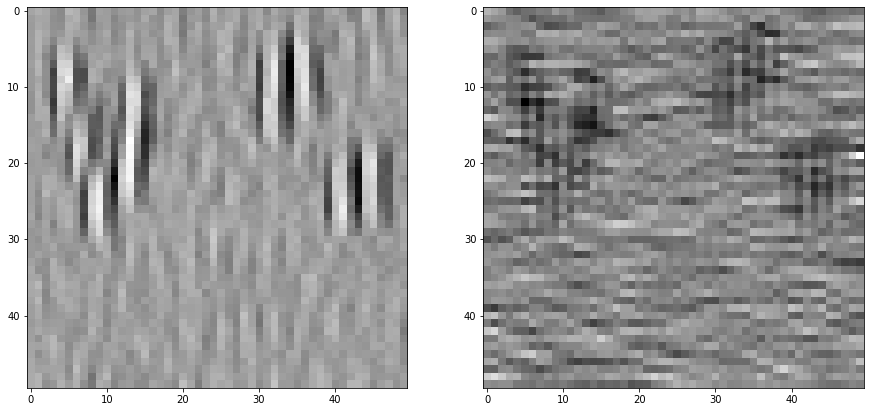

In [82]:
conv_layer = model.layers[0]
filters, biases = conv_layer.get_weights()

nrows, ncols = 1, 2
count = 0
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
for i in range(nrows):
    for j in range(ncols):
        f = filters[:, :, 0, count]
        index = np.where(y0 == 1)[0][0]
        img = x0[index, :, :, 0]
        grad = signal.convolve2d(img, f, boundary='symm', mode='same')
        axes[j].imshow(grad, cmap='gray')
        count += 1

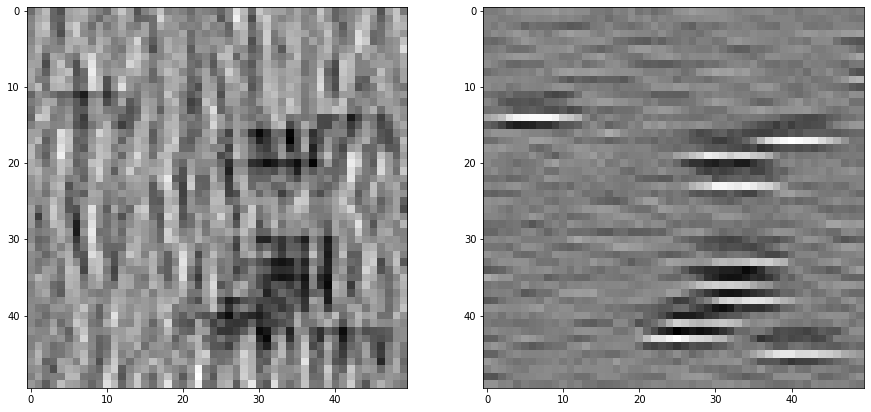

In [83]:
conv_layer = model.layers[0]
filters, biases = conv_layer.get_weights()

nrows, ncols = 1, 2
count = 0
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
for i in range(nrows):
    for j in range(ncols):
        f = filters[:, :, 0, count]
        index = np.where(y0 == 0)[0][0]
        img = x0[index, :, :, 0]
        grad = signal.convolve2d(img, f, boundary='symm', mode='same')
        axes[j].imshow(grad, cmap='gray')
        count += 1